<a href="https://colab.research.google.com/github/gilsu200/DL_study/blob/main/midterm_practice_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 케라스와 텐서플로의 간략한 역사

## 딥러닝 작업 환경 설정하기

### 주피터 노트북: 권장하는 딥러닝 실험 도구

### 코랩 사용하기

#### 코랩 시작하기

#### pip로 패키지 설치하기

#### GPU 런타임 사용하기

## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [8]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**랜덤 텐서**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.7189114 ]
 [ 0.00264509]
 [-1.543211  ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7547444 ]
 [0.00125206]
 [0.9056035 ]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [2]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**텐서플로 변수 만들기**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.58872557],
       [0.73657054],
       [1.0027444 ]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

**기본적인 수학 연산**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**상수 입력 텐서와 함께 `GradientTape` 사용하기**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**(0과 1로 구성된) 타깃 생성하기**

In [5]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**두 클래스의 포인트를 그래프로 그리기**

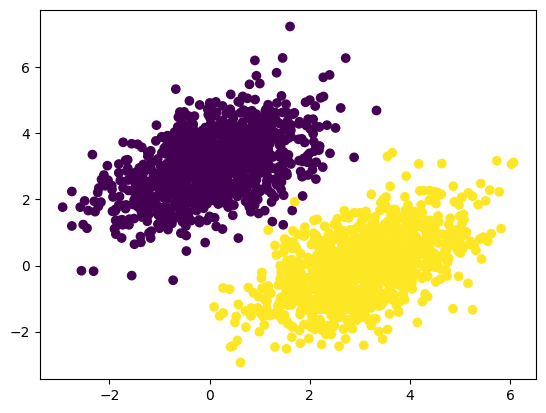

In [9]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**선형 분류기의 변수 만들기**

In [10]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**정방향 패스 함수**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 3.3138
1번째 스텝의 손실: 0.5344
2번째 스텝의 손실: 0.1863
3번째 스텝의 손실: 0.1350
4번째 스텝의 손실: 0.1208
5번째 스텝의 손실: 0.1119
6번째 스텝의 손실: 0.1043
7번째 스텝의 손실: 0.0973
8번째 스텝의 손실: 0.0910
9번째 스텝의 손실: 0.0853
10번째 스텝의 손실: 0.0800
11번째 스텝의 손실: 0.0752
12번째 스텝의 손실: 0.0708
13번째 스텝의 손실: 0.0669
14번째 스텝의 손실: 0.0632
15번째 스텝의 손실: 0.0599
16번째 스텝의 손실: 0.0568
17번째 스텝의 손실: 0.0541
18번째 스텝의 손실: 0.0515
19번째 스텝의 손실: 0.0492
20번째 스텝의 손실: 0.0471
21번째 스텝의 손실: 0.0452
22번째 스텝의 손실: 0.0434
23번째 스텝의 손실: 0.0418
24번째 스텝의 손실: 0.0404
25번째 스텝의 손실: 0.0390
26번째 스텝의 손실: 0.0378
27번째 스텝의 손실: 0.0367
28번째 스텝의 손실: 0.0357
29번째 스텝의 손실: 0.0348
30번째 스텝의 손실: 0.0339
31번째 스텝의 손실: 0.0331
32번째 스텝의 손실: 0.0324
33번째 스텝의 손실: 0.0318
34번째 스텝의 손실: 0.0312
35번째 스텝의 손실: 0.0307
36번째 스텝의 손실: 0.0302
37번째 스텝의 손실: 0.0297
38번째 스텝의 손실: 0.0293
39번째 스텝의 손실: 0.0290


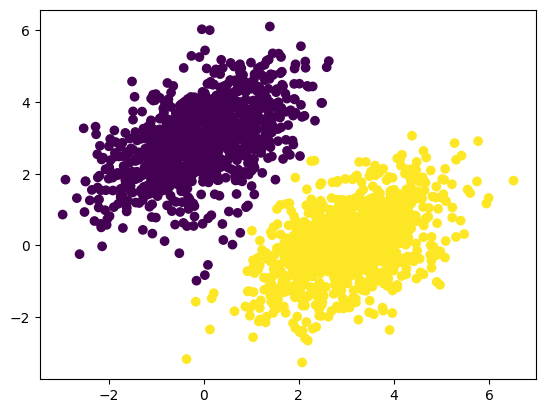

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

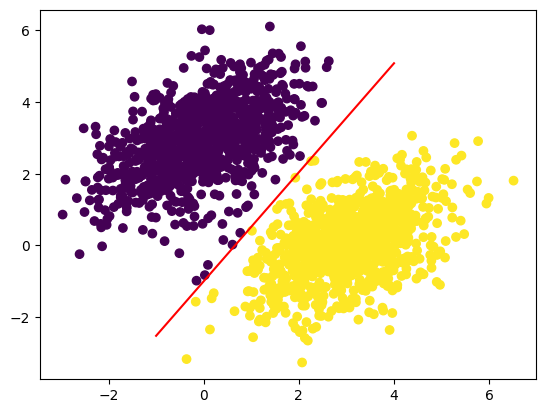

In [ ]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

- Try to modify your linear classifier not using bias term (b). Try to fit your model, what h
appens?


In [12]:
def model(inputs):
    return tf.matmul(inputs, W)
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W = tape.gradient(loss, [W])
    W.assign_sub(grad_loss_wrt_W[0] * learning_rate)
    return loss


In [13]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 3.8828
1번째 스텝의 손실: 0.1432
2번째 스텝의 손실: 0.0892
3번째 스텝의 손실: 0.0862
4번째 스텝의 손실: 0.0860
5번째 스텝의 손실: 0.0860
6번째 스텝의 손실: 0.0860
7번째 스텝의 손실: 0.0860
8번째 스텝의 손실: 0.0860
9번째 스텝의 손실: 0.0860
10번째 스텝의 손실: 0.0860
11번째 스텝의 손실: 0.0860
12번째 스텝의 손실: 0.0860
13번째 스텝의 손실: 0.0860
14번째 스텝의 손실: 0.0860
15번째 스텝의 손실: 0.0860
16번째 스텝의 손실: 0.0860
17번째 스텝의 손실: 0.0860
18번째 스텝의 손실: 0.0860
19번째 스텝의 손실: 0.0860
20번째 스텝의 손실: 0.0860
21번째 스텝의 손실: 0.0860
22번째 스텝의 손실: 0.0860
23번째 스텝의 손실: 0.0860
24번째 스텝의 손실: 0.0860
25번째 스텝의 손실: 0.0860
26번째 스텝의 손실: 0.0860
27번째 스텝의 손실: 0.0860
28번째 스텝의 손실: 0.0860
29번째 스텝의 손실: 0.0860
30번째 스텝의 손실: 0.0860
31번째 스텝의 손실: 0.0860
32번째 스텝의 손실: 0.0860
33번째 스텝의 손실: 0.0860
34번째 스텝의 손실: 0.0860
35번째 스텝의 손실: 0.0860
36번째 스텝의 손실: 0.0860
37번째 스텝의 손실: 0.0860
38번째 스텝의 손실: 0.0860
39번째 스텝의 손실: 0.0860


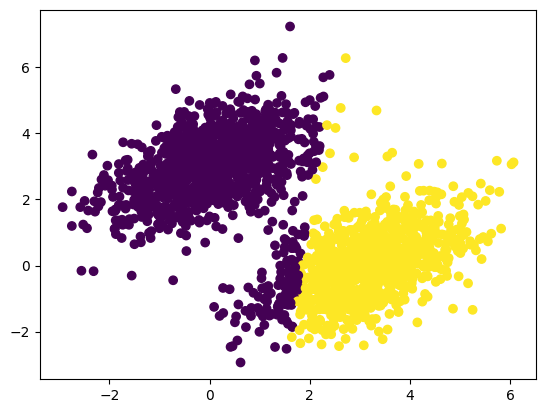

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

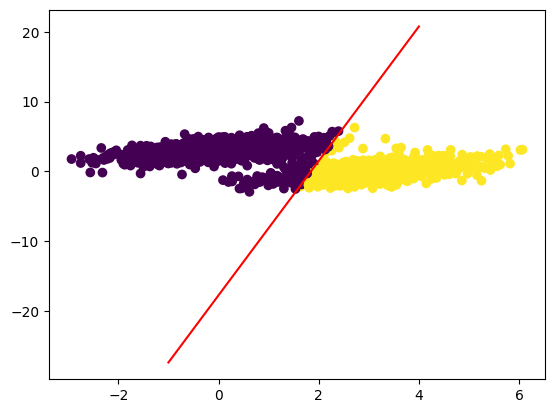

In [16]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x +0.5/ W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

### 층: 딥러닝의 구성 요소

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 층에서 모델로

### “컴파일” 단계: 학습 과정 설정

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실 함수 선택하기

### fit() 메서드 이해하기

**넘파이 데이터로 `fit()` 메서드 호출하기**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 3s 5ms/step - loss: 1.4070 - binary_accuracy: 0.6650
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 1.2352 - binary_accuracy: 0.6805
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 1.0976 - binary_accuracy: 0.6935
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.9735 - binary_accuracy: 0.7135
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 0.8597 - binary_accuracy: 0.7285


In [ ]:
history.history

{'loss': [1.4069768190383911,
  1.235182523727417,
  1.0976046323776245,
  0.9735286235809326,
  0.8597371578216553],
 'binary_accuracy': [0.6650000214576721,
  0.6804999709129333,
  0.6934999823570251,
  0.7135000228881836,
  0.7285000085830688]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

**`validation_data` 매개변수 사용하기**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 3s 13ms/step - loss: 0.2763 - binary_accuracy: 0.8943 - val_loss: 0.0400 - val_binary_accuracy: 0.9950
Epoch 2/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0727 - binary_accuracy: 0.9600 - val_loss: 0.0478 - val_binary_accuracy: 0.9933
Epoch 3/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0741 - binary_accuracy: 0.9607 - val_loss: 0.0782 - val_binary_accuracy: 0.9667
Epoch 4/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0690 - binary_accuracy: 0.9571 - val_loss: 0.1165 - val_binary_accuracy: 0.9583
Epoch 5/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0792 - binary_accuracy: 0.9464 - val_loss: 0.0233 - val_binary_accuracy: 1.0000


### 추론: 훈련한 모델 사용하기

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 3ms/step
[[ 0.1304169 ]
 [ 1.0192415 ]
 [ 0.9584348 ]
 [ 1.150435  ]
 [ 0.36042613]
 [ 0.07586262]
 [ 0.01445282]
 [-0.10492018]
 [-0.12498769]
 [ 0.28297824]]


## 요약